#  In-class Labexercise
## Case-study 1 ( KNN)

### 1.1 Load the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score

### 1.2 Read the dataset(PlayTennis.csv):

In [4]:
df=pd.read_csv("PlayTennis.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
df=df.drop([""])

### 1.3 Use the  LabelEncoder(Concerting categarical to Numarical data)

In [16]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Play Tennis']= label_encoder.fit_transform(df['Play Tennis']) 
  
df['Outlook']= label_encoder.fit_transform(df['Outlook']) 
df['Temperature']= label_encoder.fit_transform(df['Temperature']) 
df['Humidity']= label_encoder.fit_transform(df['Humidity']) 
df['Wind']= label_encoder.fit_transform(df['Wind'])
  

### 1.4 Extract the independent variable X and dependent variable Y?

In [18]:
x=df.drop(["Play Tennis"],axis=1)
y=df["Play Tennis"]

### 1.5 Visualize the data:(countplot)

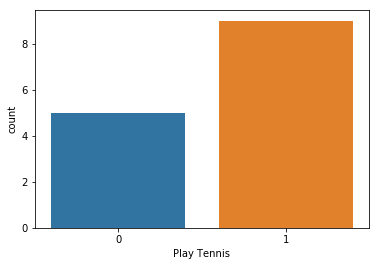

In [19]:
sns.countplot(x=df["Play Tennis"])

### 1.6 Split the data into train and test set:(70/30)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### 1.7 Train a knn

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

0.6

# Confusion matrix

array([[1, 0],
       [2, 2]])

In [32]:
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print(precision,recall)

1.0 0.5


### 1.8 Predict the model:

In [44]:
y_pred=knn.predict(x_test)

In [45]:
knn.score(x_test,y_test)

0.6

### 1.9 Evaluation the model:(classification_report)

In [34]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
cm= confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [2, 2]])

In [35]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
cm= confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [2, 2]])

# Case-study 2  (NB)

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [36]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
x=df.drop("Outcome",axis=1)
y=df.Outcome

### 2.2 Find out the feature columns

In [41]:
import statsmodels.api as sm

#Backward Elimination
cols = list(df.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome']


/Users/shriyagupta/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 2.3 Extract the independent variable X and dependent variable Y?

In [43]:
x=df.drop(["Pregnancies","Insulin","DiabetesPedigreeFunction","Age"],axis=1)
y=df.Outcome

### 2.4 Split the data into train and test set:(70/30)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### 2.5 Train a GaussianNB?

In [47]:
np=GaussianNB()
np.fit(x_train,y_train)
prediction=np.predict(x_test)

### 2.6 Predict the model:

In [48]:

x_test=sc.fit_transform(x_test)

NameError: name 'sc' is not defined

### 2.7 Evaluation the model:(classification_report)

### 2.8 Conclusion:



### 2.9 Confusion matrix

In [1]:
# this produces a 2x2 numpy array (matrix)


### 2.10 what is Basic terminology For Confusion matrix?

True Positives (TP): 

True Negatives (TN):

False Positives (FP): 

* Falsely predict positive

Type I error

False Negatives (FN): 


* Falsely predict negative

Type II error

0: negative class

1: positive class

### 2.11 print the first 25 true and predicted responses

### 2.12 save confusion matrix and slice into four pieces

### 2.13 Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

Sensitivity: When the actual value is positive, how often is the prediction correct?



Specificity: When the actual value is negative, how often is the prediction correct?



False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

### 2.14 Adjusting the classification threshold?

#### print the first 10 predicted responses?

#### print the first 10 predicted probabilities of class membership

#### print the first 10 predicted probabilities for class 1

#### store the predicted probabilities for class 1

#### plot histogram of predicted probabilities

#### create 8 bins

### print the first 10 predicted probabilities

### create new confusion matrix 

### 2.14 Receiver Operating Characteristic (ROC) Curves

#### define a function that accepts a threshold and prints sensitivity and specificity

# 3. What is advantages Confusion matrix and ROC/AUC?